# Some code related to polynomial interpolation

## Poly evaluation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.polyval([1,2,3,4], 5)  # evaluate 1*x^3 + 2*x^2 + 3*x^1 + 4 at x=5

194

Note that the first coordinate is the coefficient of the highest deg.

## Find the polynomial interpolant given n+1 points

In [3]:
def VandPolyInterp(x,y):
    # x stores n+1 x-coordinates
    # y stores n+1 y-coordinates
    n = len(x) - 1
    
    # form the Vandermonde matrix given x
    V = np.zeros((n+1,n+1))
    for i in range(0,n+1):
        V[:,i] = np.power(x,i)
    
    return np.linalg.solve(V,y)

In [4]:
# test
x = np.array([-1,0,2])
y = np.array([0,1,1])
VandPolyInterp(x,y)

array([ 1.        ,  0.66666667, -0.33333333])

## define the Runge function $R(x) = \frac{1}{1+25x^2}$.

In [5]:
def Runge(x): return 1/(1+25*x**2)

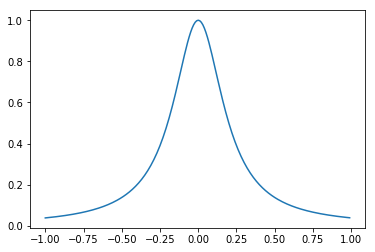

In [6]:
x = np.arange(-1,1,0.01)
plt.plot(x,Runge(x))
plt.show()

## Sample n+1 equally spaced points on this function

In [7]:
n = 10
xp = np.linspace(-1,1,n+1)
yp = Runge(xp)
xp

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

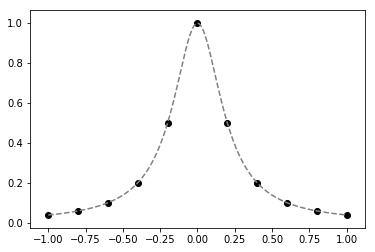

In [8]:
plt.plot(x,Runge(x), color='grey', linestyle='--')
plt.scatter(xp,yp, color='k')
plt.show()

## Now we find the polynomial of deg n that interpolate (xp,yp)

In [9]:
coeff = VandPolyInterp(xp,yp)

In [10]:
coeff

array([ 1.00000000e+00, -4.44333586e-14, -1.68552036e+01,  1.10097117e-12,
        1.23359729e+02, -6.96092214e-12, -3.81433824e+02,  1.27935856e-11,
        4.94909502e+02, -6.88920130e-12, -2.20941742e+02])

In [11]:
coeff_flip = np.flip(coeff);coeff_flip

array([-2.20941742e+02, -6.88920130e-12,  4.94909502e+02,  1.27935856e-11,
       -3.81433824e+02, -6.96092214e-12,  1.23359729e+02,  1.10097117e-12,
       -1.68552036e+01, -4.44333586e-14,  1.00000000e+00])

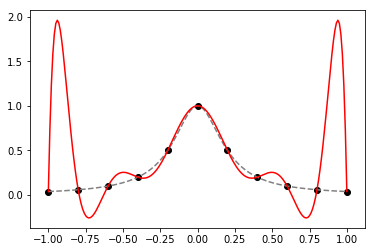

In [12]:
coeff = VandPolyInterp(xp,yp)
x = np.arange(-1,1+0.01,0.01)
plt.plot(x,Runge(x), color='grey', linestyle='--')
plt.scatter(xp,yp, color='k')
plt.plot(x,np.polyval((coeff_flip),x), color='red')
plt.show()

## Simple integration

In [13]:
from scipy.integrate import quad

In [22]:
quad(Runge, -1,1)

(0.5493603067780066, 2.8668279350011863e-09)

In [20]:
quad(lambda x:x**2, 0,1) # integrate x^2 from 0 to 1

(0.33333333333333337, 3.700743415417189e-15)

In [21]:
def diff1(x):
    return (Runge(x)-np.polyval((coeff_flip),x))**2

In [22]:
i1,e1=quad(diff1,-1,1)

The value below is $\|R-p\|_2$, where $R(x)$ is the runge function and $p(x)$ is the polynomial that we found.

In [25]:
d1=i1**0.5;d1  

0.8207834223877687

## Chebyshev nodes

In [28]:
import math

In [31]:
#xc = cos(pi*i/n), i=0,1,2,...,n
xc = np.cos(np.arange(0,n+1)*math.pi/n) #these are chebyshev nodes
yc = Runge(xc)

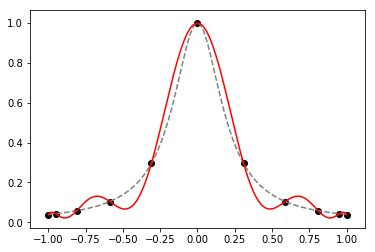

In [32]:
coeff_c = VandPolyInterp(xc,yc)
coeff_c_flip = np.flip(coeff_c)
x = np.arange(-1,1+0.01,0.01)
plt.plot(x,Runge(x), color='grey', linestyle='--')
plt.scatter(xc,yc, color='k')
plt.plot(x,np.polyval((coeff_c_flip),x), color='red')
plt.show()

In [33]:
def diff2(x):
    return (Runge(x)-np.polyval((coeff_c_flip),x))**2
i2,e2=quad(diff2,-1,1)

The value below is $\|R-Q\|_2$, where $R(x)$ is the Runge function, and $Q(x)$ is the polynomial interpolant using Chebyshev nodes.

In [34]:
print(i2**0.5)

0.08776952619269414


## Cubic Spline

Python has a built-in function that finds cubic spline. We can verify our answer in Exampe 4.10.

In [5]:
from scipy.interpolate import CubicSpline

In [3]:
x = np.array([0, 1, 2, 3, 4]); y = np.array([0, 0, 2, 2, -1])  # enter the x, y coordinates

In [6]:
cs = CubicSpline(x,y,bc_type='natural')  # natural boundary condition means z_0=z_n=0

The output cs is a class and has attributes

In [7]:
cs.c  # this is returning the coefficients of all 4 cubics

array([[ 0.625, -1.125, -0.125,  0.625],
       [ 0.   ,  1.875, -1.5  , -1.875],
       [-0.625,  1.25 ,  1.625, -1.75 ],
       [ 0.   ,  0.   ,  2.   ,  2.   ]])

In cs.c, the first column will be the coefficients for the first cubic.

We need to be extra careful when retrieving the cubics. For example, $q_3$, the third piece, is defined on [2,3], so 

$q_3(x)=-0.125(x-2)^3-1.5(x-2)^2+1.625(x-2)+2$

### draw the third piece

In [8]:
cs.c[:,2]

array([-0.125, -1.5  ,  1.625,  2.   ])

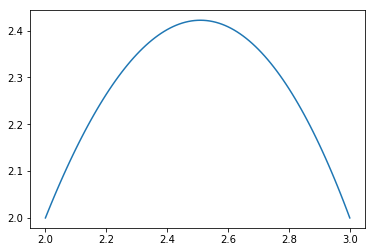

In [9]:
t = np.arange(x[2],x[3]+0.01,0.01)
plt.plot(t, np.polyval(cs.c[:,2], t-x[2]))
plt.show()

We could use np.polyval to draw all 4 pieces individually, but CubicSpline already did it for us!

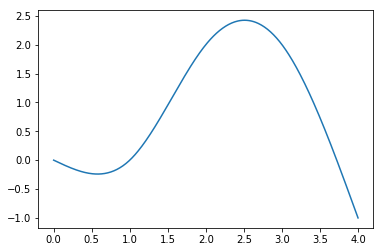

In [10]:
t = np.arange(x[0],x[-1]+0.01,0.01)  # x[-1] is the last entry of the array x
plt.plot(t, cs(t))
plt.show()